In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check for missing values

In [3]:
df.shape

(907, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
for i in df.columns :
    print(df[i].value_counts())
    print('\n')

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

from above we jump to a final conclusion that :
- we will remove columns country , country long because they have one entry and not necessary
- we will remove column gppd_idnr as it has unnecessary data
- we will remove column other_fuel1 as most of its data are missing
- we remove column other_fuel2 as it has one entry so it will not have any implications in prediction and we will remove other_fuel3 as it is empty
- we will remove columns commissioning_year ,url , source as it has no useful data
- we will remove column wepp_id as it is empty
- we will remove column year_of_capacity_data bcause it has one entry value and missing data
- we will remove column generation_gwh_2019 because it is empty
- we will remove column generation_data_source as most of its data are missing
- we will remove column year_of_capacity_data because most of its data re missing and has one unique value

In [7]:
df.drop(['country', 'country_long', 'name', 'gppd_idnr','other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'url','wepp_id', 'year_of_capacity_data','generation_gwh_2013','generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'] , axis =1 , inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   888 non-null    object 
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(8), object(3)
memory usage: 78.1+ KB


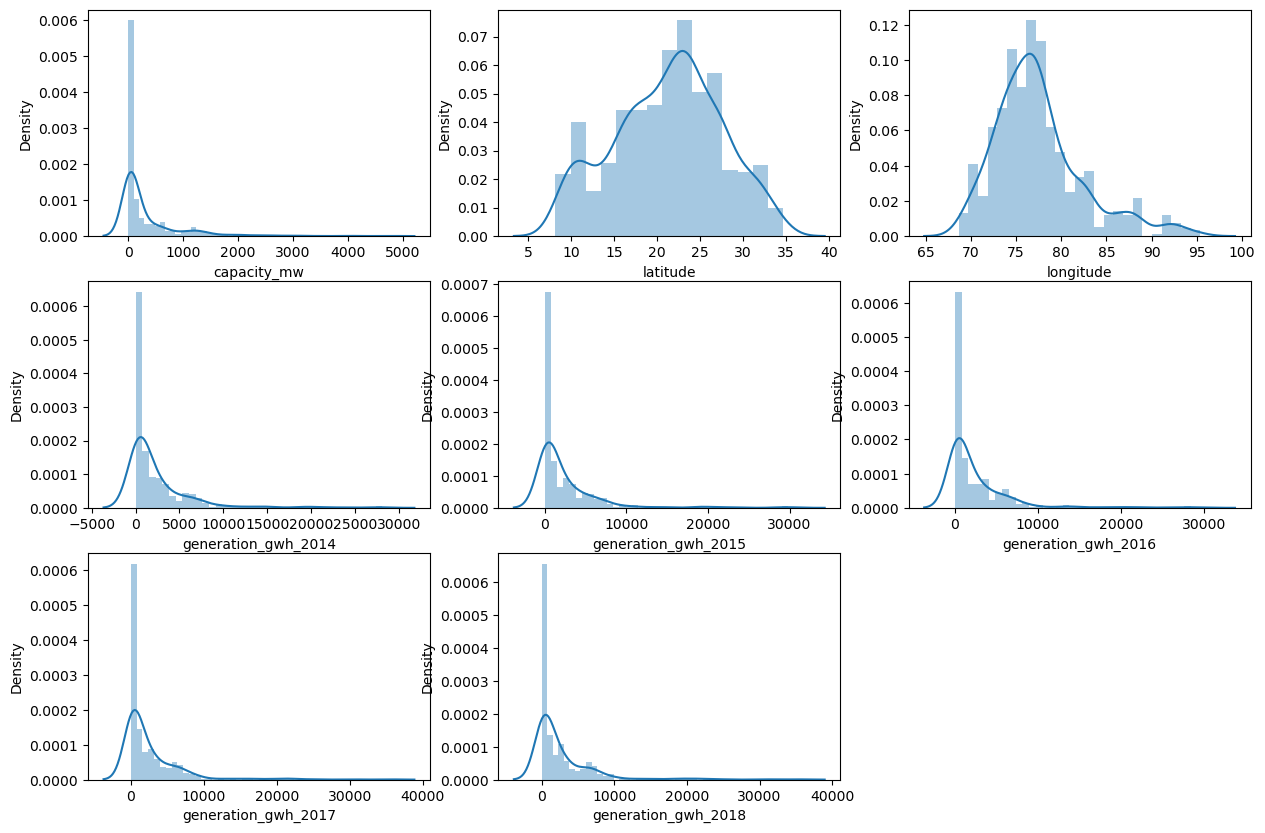

In [9]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in df.columns :
    if plotnumber <= 9 :
        if df[i].dtypes == 'object' :
            continue
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i , fontsize=10)
    plotnumber +=1
plt.show()    

In [10]:
# now let us indicate the percent of missing values to decide which method to use in filling missing data
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage = (missing_values/len(df)*100)
missing = pd.DataFrame()
missing['number of missing values'] = missing_values
missing['% percentage of missing values'] = percentage
print(missing)

                     number of missing values  % percentage of missing values
generation_gwh_2014                       509                       56.119074
generation_gwh_2015                       485                       53.472988
generation_gwh_2016                       473                       52.149945
generation_gwh_2017                       467                       51.488423
generation_gwh_2018                       459                       50.606395
latitude                                   46                        5.071665
longitude                                  46                        5.071665
geolocation_source                         19                        2.094818
capacity_mw                                 0                        0.000000
primary_fuel                                0                        0.000000
source                                      0                        0.000000


- more than half of data in columns generation_gwh_2014 , generation_gwh_2015 ,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are missing so we do not need them as it is a logitic regression problem so we will use median to fill nan values to visualize data as it has outliers and skewwness and then drop them

- geolocation_source is a categorical data so we will use mode to fill missing data
- we will use 
- longitude is skewed to right so it has outliers so we will use median
- we will use mean for latitude as it is normally distributed with no outliers or skewness
- we will use mode method in column geolocation_source as it is categorical data
- capacity_mw , primary_fuel are not having missing values

In [11]:
# let us cheeck for any abnormal values
df.isin(['?',' ','NAN','-']).sum().any(axis=0)

False

There are no abnormal values between missing values so we can go ahead

In [12]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [13]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

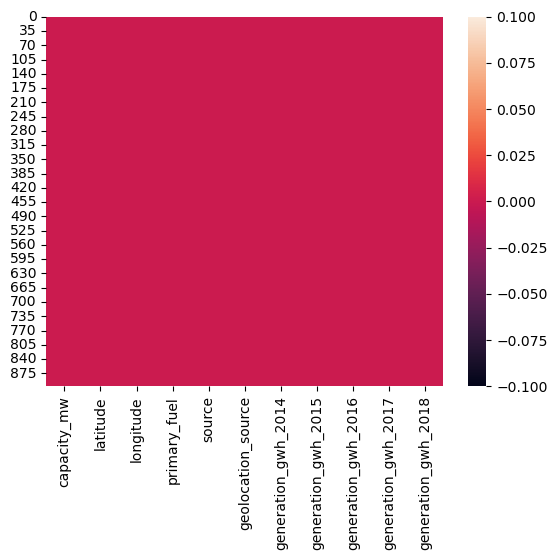

In [14]:
sns.heatmap(df.isnull())
plt.show()

we removed missing values

# EDA

In [15]:
df.shape

(907, 11)

In [16]:
#check for duplicates
df.duplicated().sum()

6

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(901, 11)

In [19]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,328.288397,21.197918,77.431815,1521.455103,1515.391319,1570.876295,1662.709885,1671.093383
std,591.502582,6.099379,4.830749,2794.259413,2994.212853,3014.324148,3056.229223,3178.491376
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,17.055200,74.385800,801.123775,711.181225,737.205450,817.977250,751.644375
50%,60.000000,21.317000,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375
75%,388.500000,25.196000,79.220600,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


from above we summerize that :
-  all columns are having the same number of rows
- mean is greter than median(50%) in all columns except latitude which indicates that they are skewed to right
- latitude data are normally distributed
- in all columns except latitude there is a big difference between 75% percentile value and maximum value which says there are outliers
- generation_gwh_2014 ,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are categorical data

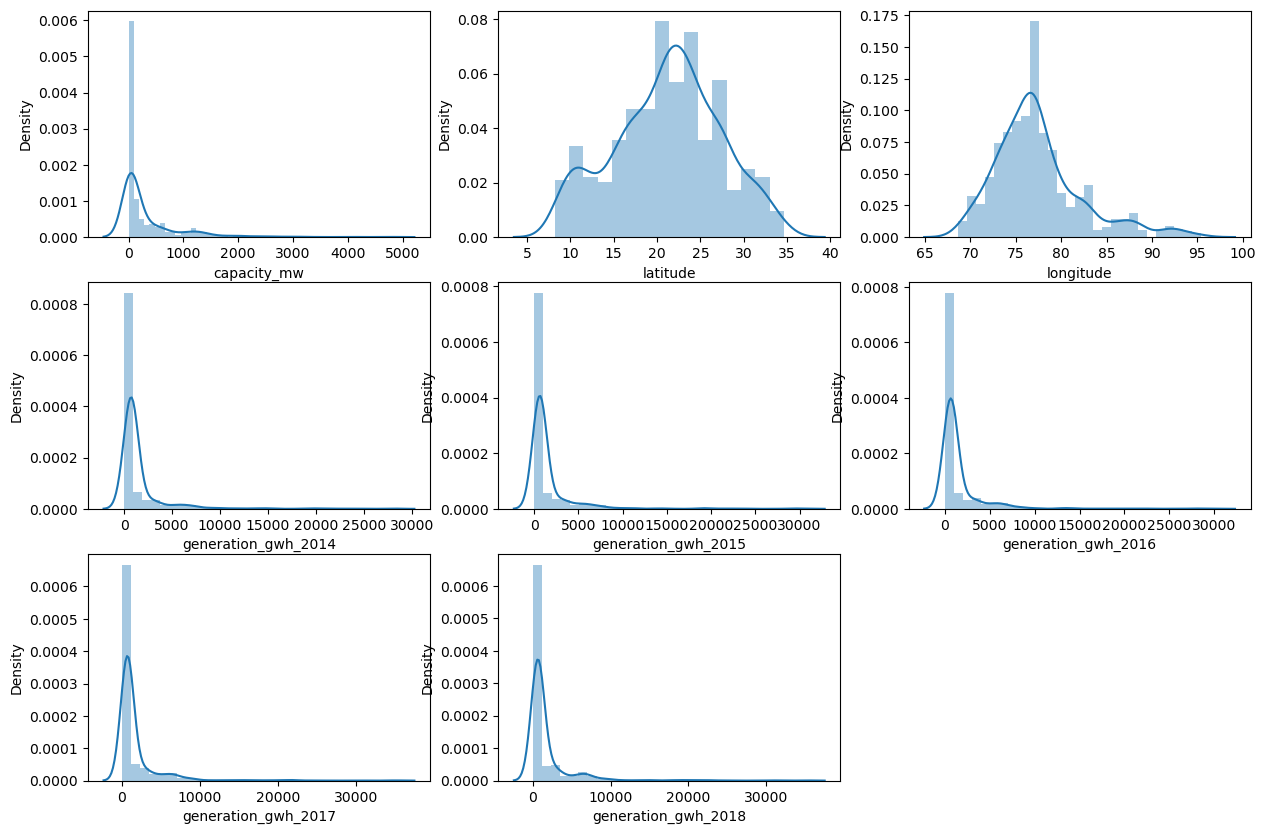

In [20]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in df.columns :
    if plotnumber <= 9 :
        if df[i].dtypes == 'object' :
            continue
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i , fontsize=10)
    plotnumber +=1
plt.show()    

# Data Visualization

In [21]:
df

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,Wind,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


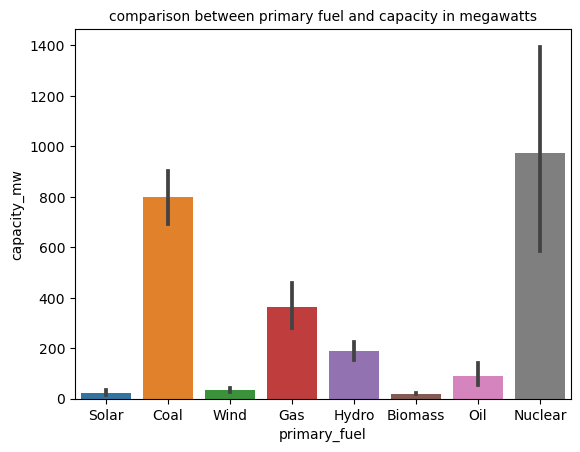

In [22]:
sns.barplot(x=df['primary_fuel'] , y=df['capacity_mw'])
plt.title('comparison between primary fuel and capacity in megawatts' , fontsize=10)
plt.show()

Nuclear power planet is the using the highest consumption of electricity

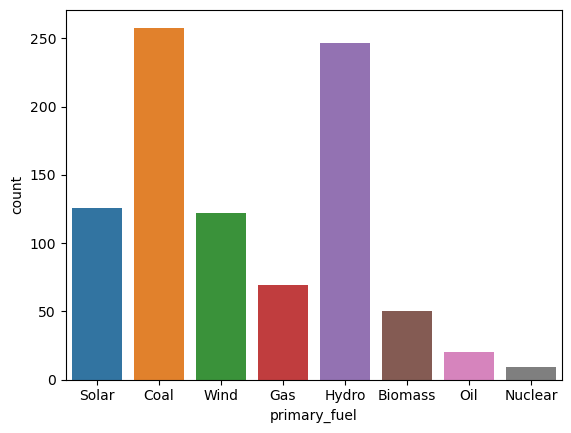

In [23]:
sns.countplot(x= df['primary_fuel'])
plt.show()

- Coal fuel technology is the highest and most used to generate energy and Hydro is the second rate 
- Nuclear is the least in use

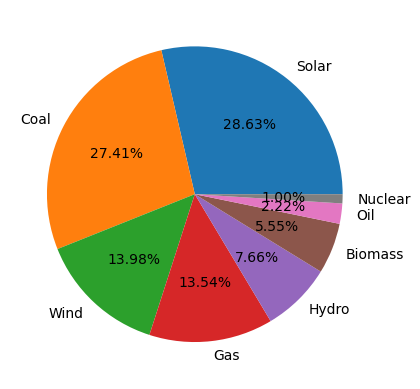

In [24]:
plt.pie(x=df['primary_fuel'].value_counts() , labels=df['primary_fuel'].unique() ,autopct='%.2f%%')
plt.show()

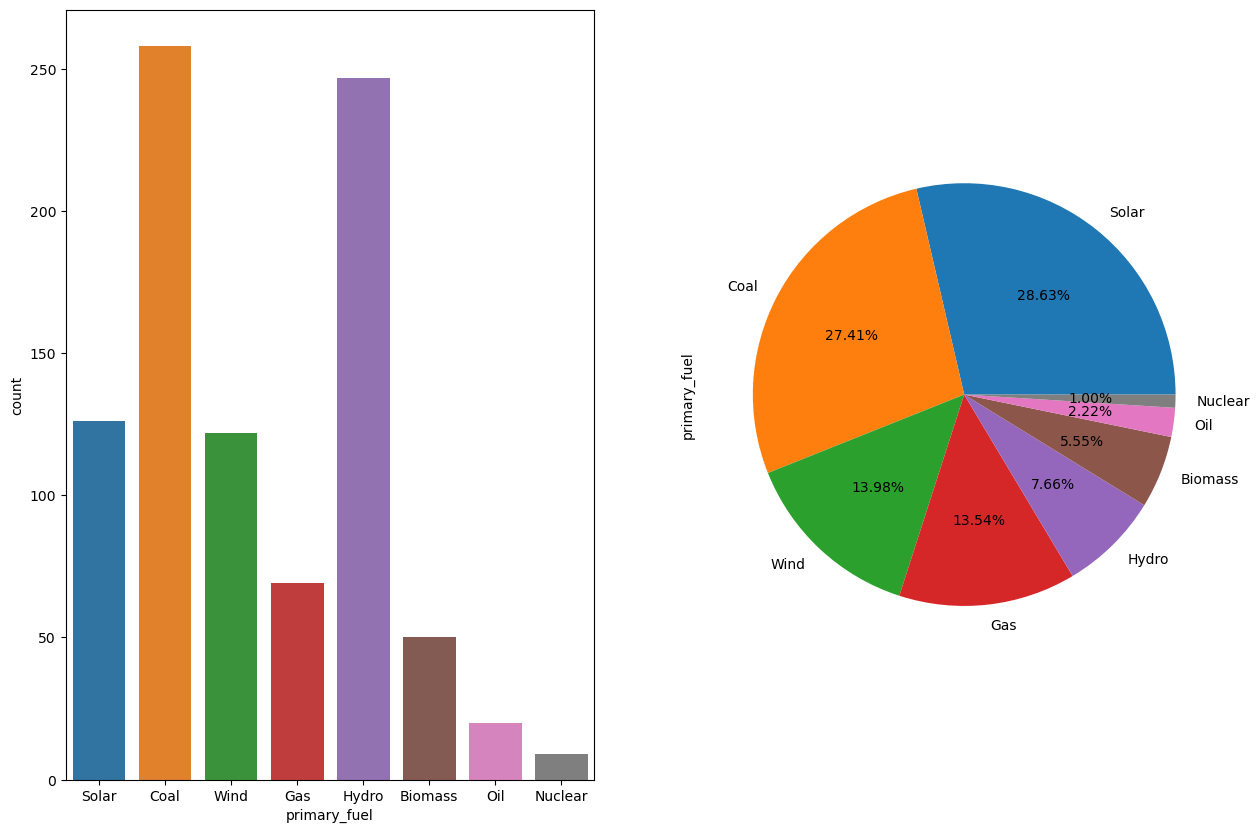

In [25]:
fig , ax = plt.subplots(1,2,figsize=(15,10))
sns.countplot(x= df['primary_fuel'] , ax=ax[0])
df['primary_fuel'].value_counts().plot(kind='pie' , labels=df['primary_fuel'].unique() ,autopct='%.2f%%' , ax=ax[1])
plt.show()

- 56% of sources of energy on planet are polluting non renewable source
- coal is the most used source of energy and Hydro is the second
- Hydro is the most useful renewable source of energy regardless of its low percent of existance 7.66 %

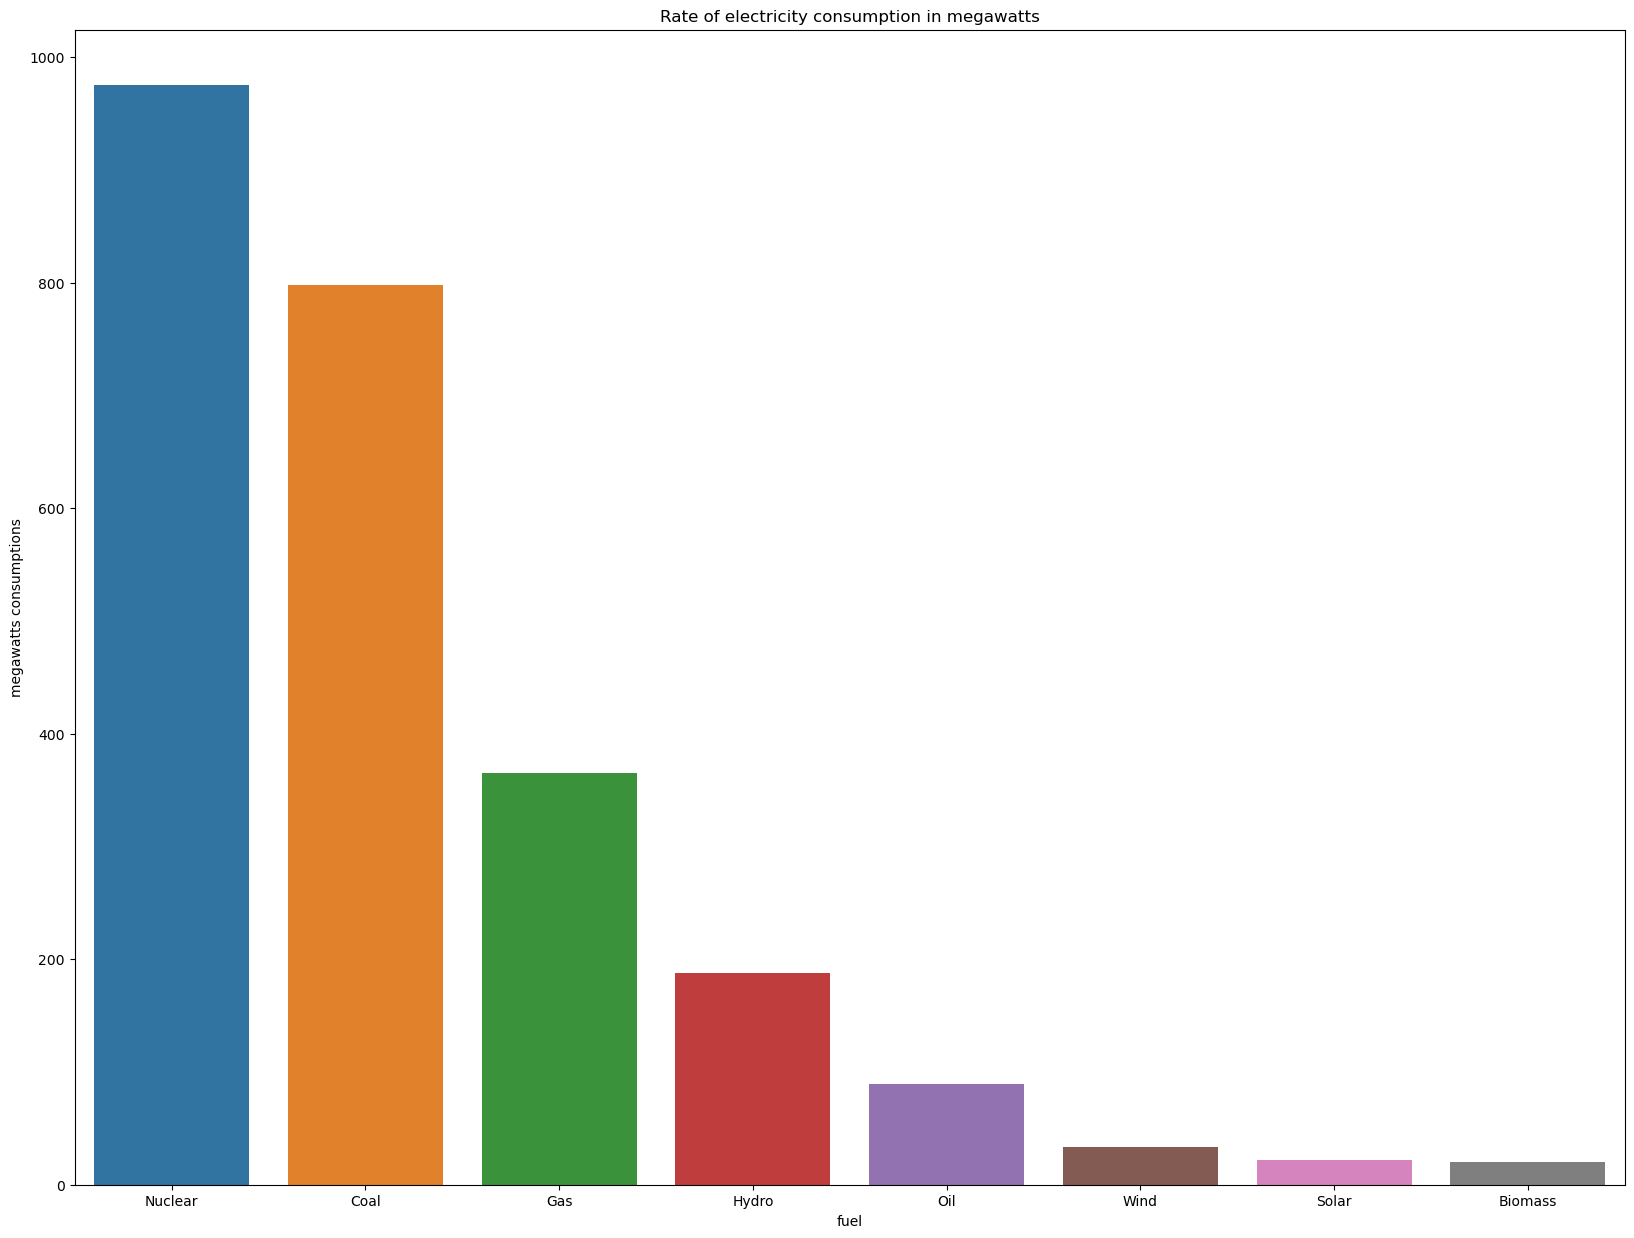

In [26]:
energy = df.groupby('primary_fuel')['capacity_mw'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,15))
sns.barplot(x='primary_fuel' , y='capacity_mw' , data=energy)
plt.title('Rate of electricity consumption in megawatts' )
plt.xlabel('fuel')
plt.ylabel('megawatts consumptions' )
plt.show()

- Nuclear fuel technlogy is consuming the highest rate of electricity by average of 975.55
- Biomass is the least in consumption of electricity

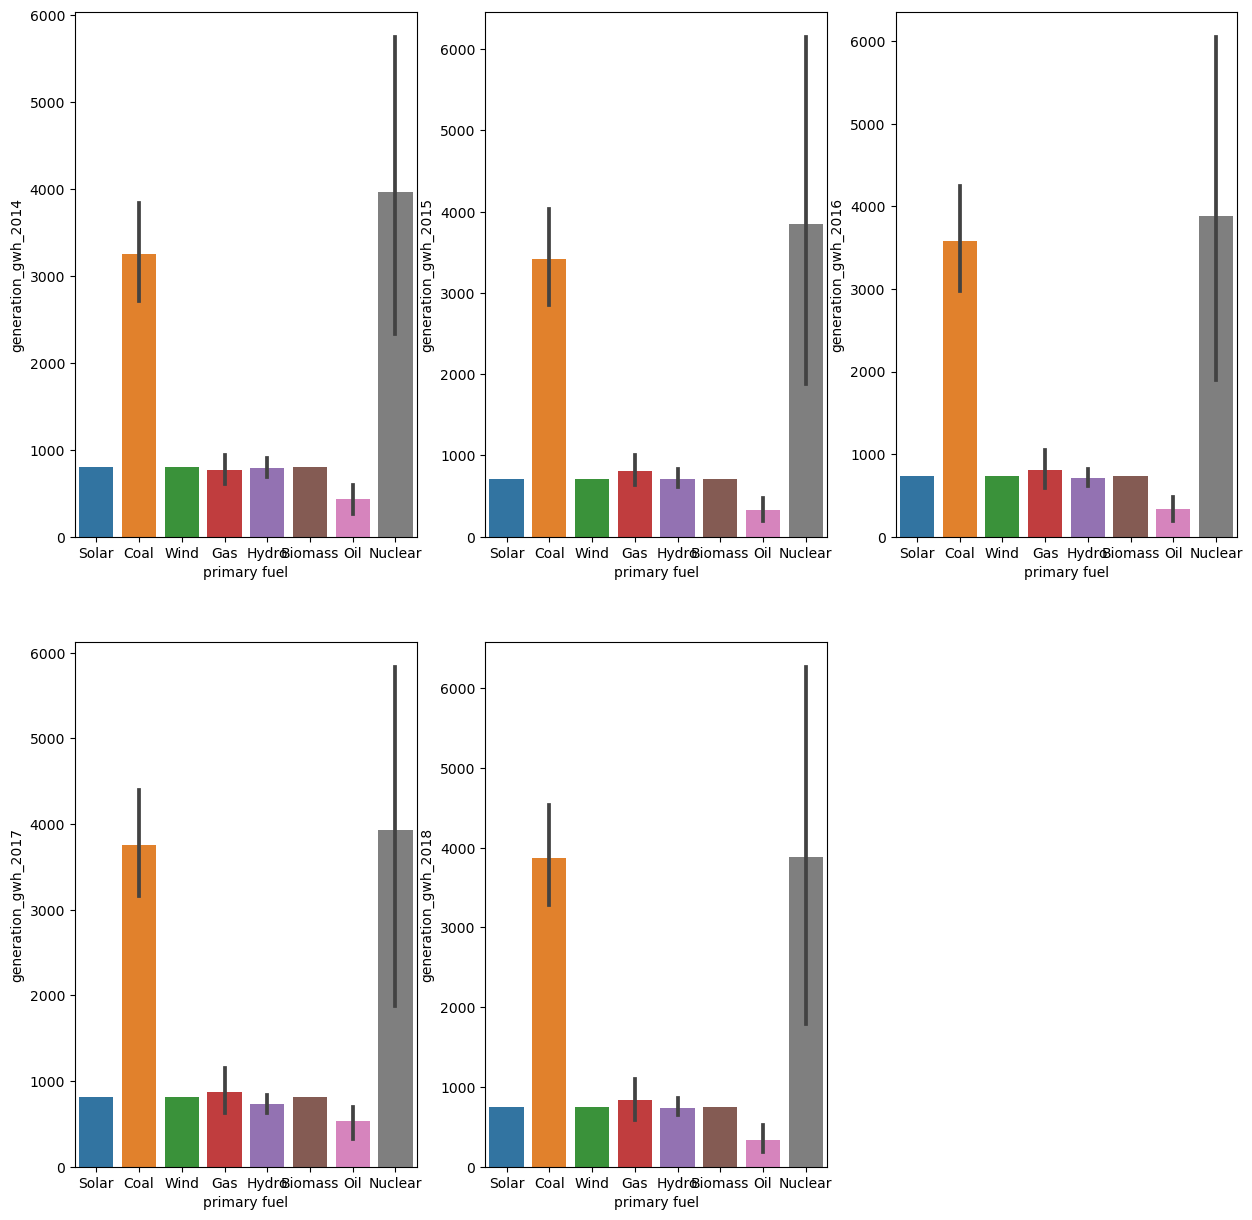

In [27]:
plt.figure(figsize=(15,15))
plotnumber=1
cols = ['generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
for i in cols:
    if plotnumber <=5 :
        ax = plt.subplot(2,3,plotnumber)
        sns.barplot(x=df['primary_fuel'] , y=df[i])
        plt.xlabel('primary fuel')
        plt.ylabel(i)
    plotnumber += 1
plt.show()    

- Nuclear technology has the highest electricity generation in gigawatt-hours average over all the years and the coal is in the second rate
- oil is the least electricity generation in gigawatt-hours average

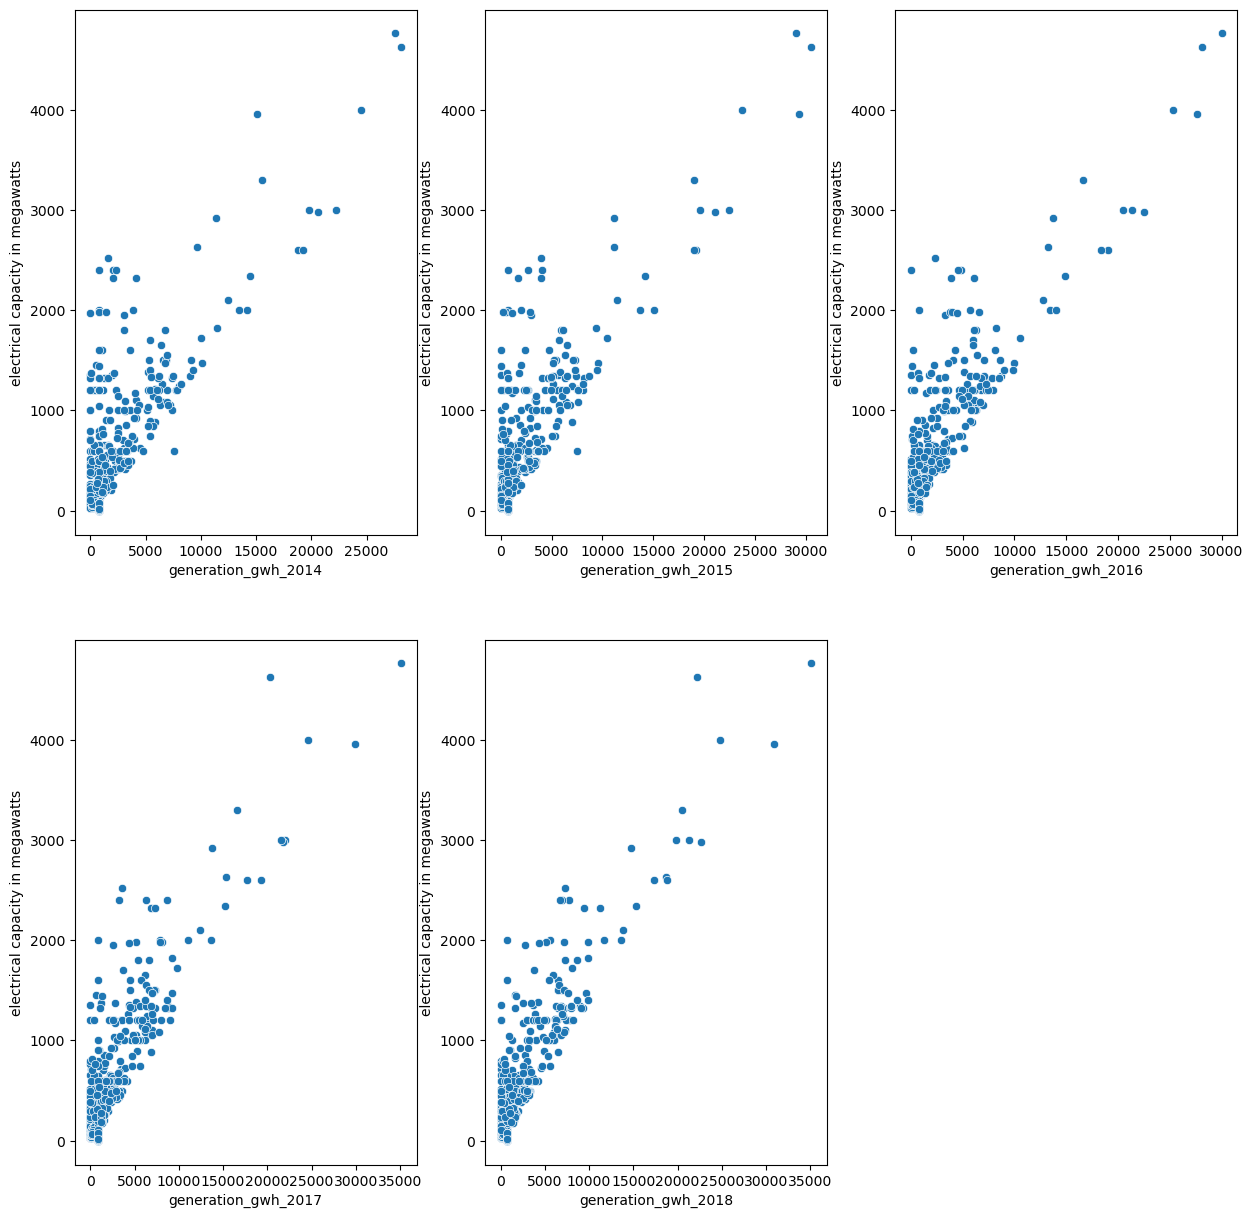

In [28]:
plt.figure(figsize=(15,15))
plotnumber=1
cols = ['generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
for i in cols:
    if plotnumber <=5 :
        ax = plt.subplot(2,3,plotnumber)
        sns.scatterplot(x=df[i] , y=df['capacity_mw'])
        plt.xlabel(i)
        plt.ylabel('electrical capacity in megawatts')
    plotnumber += 1
plt.show()    

- electricty capacity is increasing above 1000 megawatts over all years
- electricity generation in gigawatt-hours is increasing above 5000 gigawatts over all years
- there is a positive incresing relationship between electricity capacity and generation growth

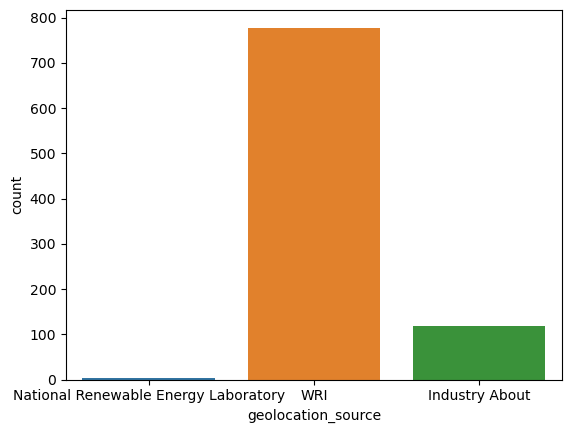

In [29]:
sns.countplot(x=df['geolocation_source'])
plt.show()

- WRI geolocation source is the most used

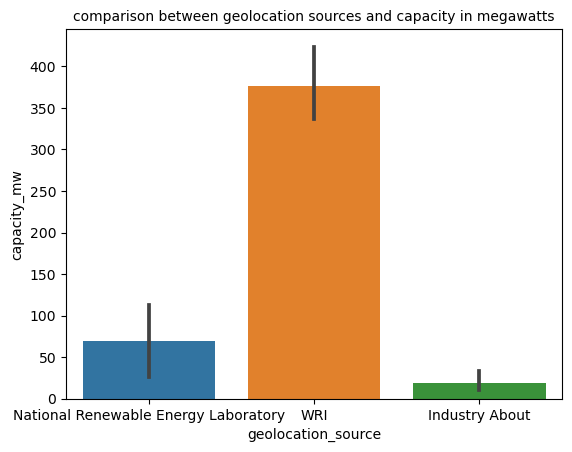

In [30]:
sns.barplot(x=df['geolocation_source'] , y=df['capacity_mw'])
plt.title('comparison between geolocation sources and capacity in megawatts' , fontsize=10)
plt.show()

- WRI geolocation source is consuming the highest rate of electricity above 350 megawatts while industry sector is the least

# checking for ouliers

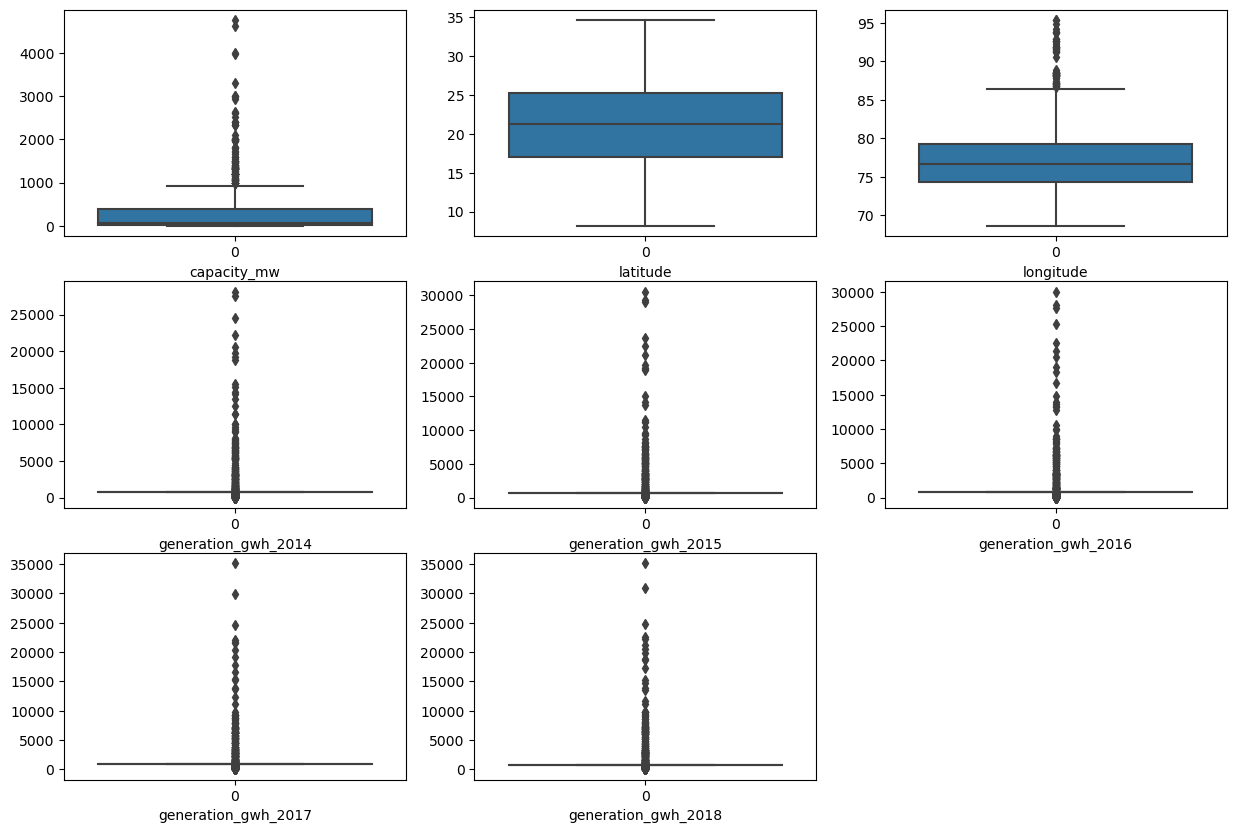

In [31]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in df.columns :
    if plotnumber <= 9 :
        if df[i].dtypes == 'object' :
            continue
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i , fontsize=10)
    plotnumber +=1
plt.show()    

- all columns are having outliers except latitude
- Columns generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are showing inappropriate quantile data values as most of data was already missed so we will drop them
- we will use 0 percentile as the lowest value in capacity_mw is 0 

In [32]:
df.drop(['generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],axis=1, inplace=True)

In [33]:
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,CDM,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [33]:
#use zscore method
from scipy.stats import zscore

In [34]:
outliers= df[['capacity_mw','longitude']]
z = np.abs(zscore(outliers))

In [35]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(867, 6)

In [36]:
print('percentage of loss is ',((df.shape[0]-df1.shape[0])/df.shape[0])*100,' %')

percentage of loss is  3.7735849056603774  %


In [37]:
# use IQR method
out= df[['capacity_mw','longitude']]
q1 = out.quantile(0)
q3 = out.quantile(0.75)
IQR = q3 - q1
df2 = df[~((df <(q1 - 1.5*IQR))|(df>(q3 + 1.5*IQR))).any(axis=1)]

In [38]:
print('percentage of loss is ',((df.shape[0]-df2.shape[0])/df.shape[0])*100,' %')

percentage of loss is  12.763596004439512  %


IQR is the best method to use

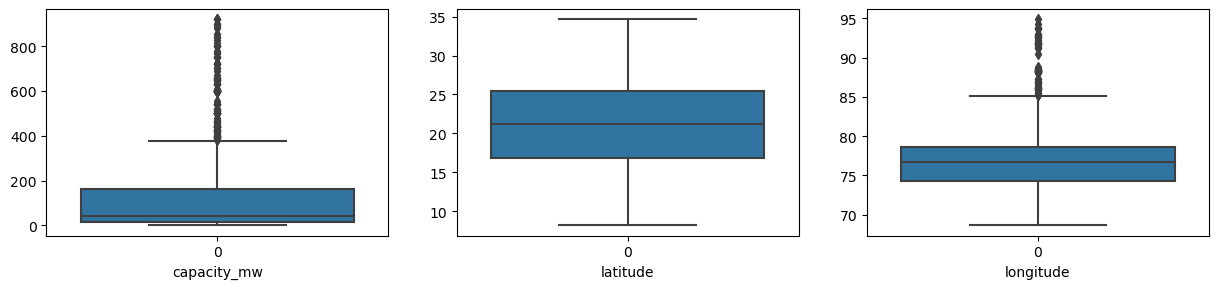

In [39]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in df2.columns :
    if plotnumber <= 9 :
        if df[i].dtypes == 'object' :
            continue
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[i])
        plt.xlabel(i , fontsize=10)
    plotnumber +=1
plt.show()    

we reduced outliers as we could

# skewness

In [40]:
df2.skew()

capacity_mw    1.861272
latitude      -0.104047
longitude      1.305723
dtype: float64

- capacity_mw and longitude are skewed so we will remove only skewness of longitude bcause capacity_mw is a target label
- longitude are having a positive skew value > 0 and have outliers so we will use power transform method to reduce skewness

In [41]:
from sklearn.preprocessing import PowerTransformer

In [42]:
power = PowerTransformer(method='yeo-johnson')
df2[['longitude']] = power.fit_transform(df2[['longitude']].values)

In [43]:
df2.skew()

capacity_mw    1.861272
latitude      -0.104047
longitude     -0.006558
dtype: float64

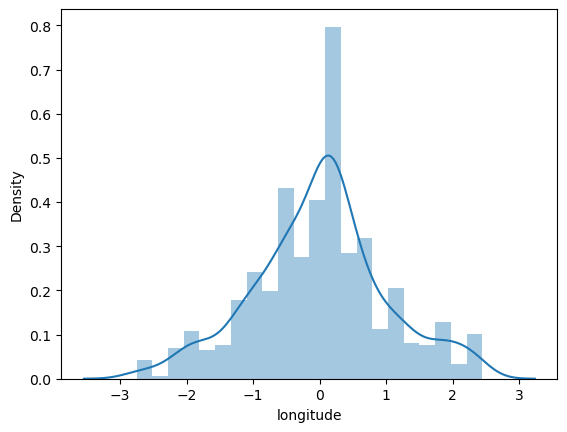

In [44]:
# now check the distribution
sns.distplot(df2['longitude'])
plt.show()

we removed skewness and data is normally distributed

# correlation

In [45]:
#conver categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
df2['source'] = le.fit_transform(df2['source'])
df2['geolocation_source'] = le.fit_transform(df2['geolocation_source'])

In [47]:
df2['primary_fuel'] = le.fit_transform(df2['primary_fuel'])

In [48]:
df2['geolocation_source'].unique()

array([1, 2, 0])

In [49]:
df2['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [50]:
df2.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,-0.879218,6,108,1
1,98.0,24.7663,-0.455716,1,173,2
2,39.2,21.9038,-2.399320,7,21,2
3,135.0,23.8712,2.202158,2,22,2
5,250.0,23.7689,-2.751320,1,22,2


In [51]:
df2.corr()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
capacity_mw,1.000000,0.079754,0.245096,-0.367933,-0.285389,0.251979
latitude,0.079754,1.000000,-0.061539,-0.000181,0.069497,-0.202339
longitude,0.245096,-0.061539,1.000000,-0.384008,-0.232498,0.294388
primary_fuel,-0.367933,-0.000181,-0.384008,1.000000,-0.006888,-0.470815
source,-0.285389,0.069497,-0.232498,-0.006888,1.000000,-0.492135
geolocation_source,0.251979,-0.202339,0.294388,-0.470815,-0.492135,1.000000


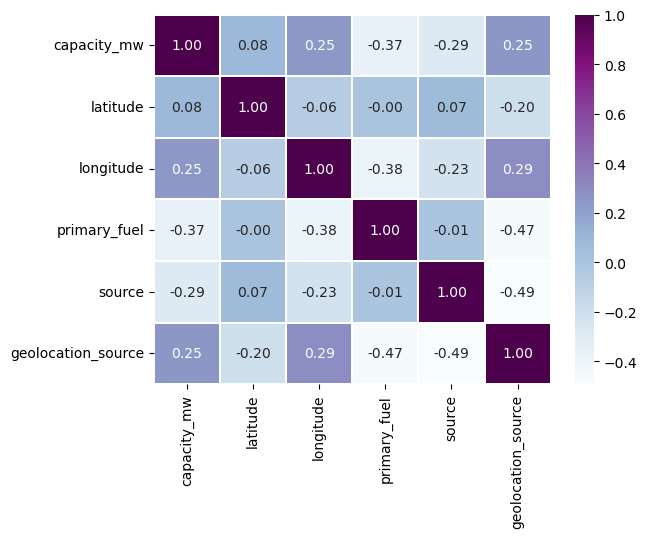

In [52]:
sns.heatmap(df2.corr() , annot=True , linewidth=0.1 ,cmap='BuPu' , fmt='0.2f')
plt.show()

- capacity_mw target label has strong negative relationship with the target label primary fuel
- capacity_mw has a linear relationship with geolocation_source and longitude features but not strong
- primary fuel target label is strongly neagatively correlated with  geolocation_source

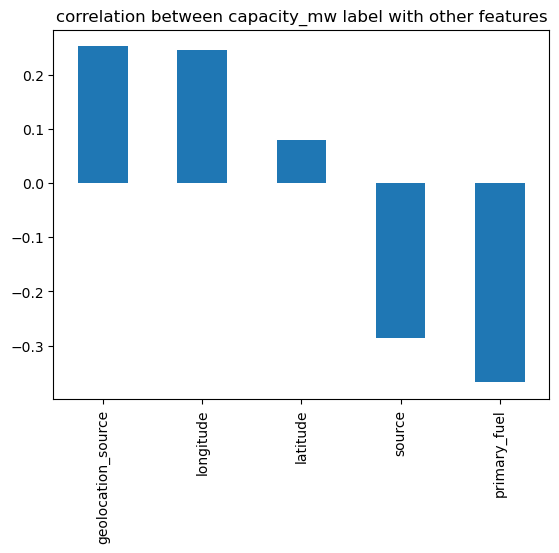

In [53]:
df2.corr()['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot(kind='bar')
plt.title('correlation between capacity_mw label with other features')
plt.show()                                                                                

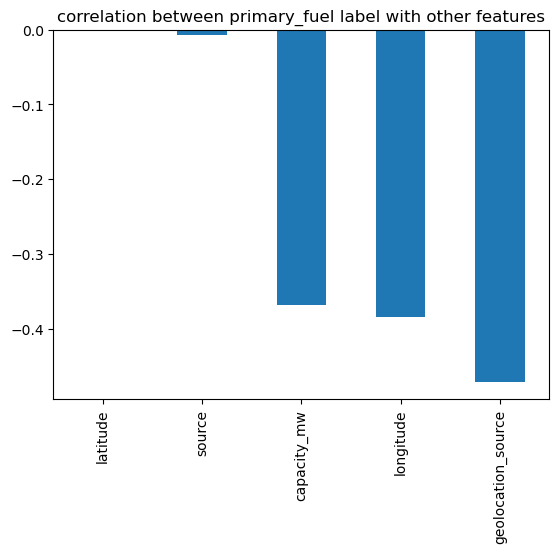

In [54]:
df2.corr()['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot(kind='bar')
plt.title('correlation between primary_fuel label with other features')
plt.show()                                                                                

# Building model for primary_fuel target label

In [55]:
x1 = df2.drop('primary_fuel' , axis=1)
y1 = df2['primary_fuel']

In [56]:
print('features dimension is ',x1.shape)
print('label dimension is ',y1.shape)

features dimension is  (786, 5)
label dimension is  (786,)


In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
x_scaler = scaler.fit_transform(x1)
x_scaled = pd.DataFrame(x_scaler, columns = x1.columns)

In [60]:
x_scaled

,capacity_mw,latitude,longitude,source,geolocation_source
0,-0.671248,1.141430,-0.879210,1.312994,-0.963600
1,-0.209637,0.589638,-0.455708,2.707693,0.428660
2,-0.493854,0.127471,-2.399312,-0.553758,0.428660
3,-0.030793,0.445119,2.202165,-0.532301,0.428660
4,0.525073,0.428602,-2.751312,-0.532301,0.428660
...,...,...,...,...,...
781,-0.168068,-1.291436,0.309309,-0.532301,0.428660
782,-0.668831,-1.327344,0.437671,0.626373,-2.355861
783,-0.560075,-0.942659,-0.184041,-0.553758,0.428660
784,-0.296642,0.522424,-0.716341,0.261605,0.428660


# Check variance inflation Factor

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
vif['variance inflation factor']= [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['column'] = x_scaled.columns

In [63]:
vif

,variance inflation factor,column
0,1.162664,capacity_mw
1,1.063906,latitude
2,1.140556,longitude
3,1.377284,source
4,1.454276,geolocation_source


There is no multicollinearity issue as all factors are lower than the permissible limit 10

# building the model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingClassifier , BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve

In [65]:
accuracy = []
stats = []
lr = LogisticRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled , y1 , test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    y_pred= lr.predict(x_test)
    acc = accuracy_score(y_test , y_pred)
    accuracy.append(acc)
    stats.append(i)

In [66]:
rand = pd.DataFrame()
rand['accuracy'] = accuracy
rand['no of stats'] = stats
rand[rand['accuracy'] == rand['accuracy'].max()]

,accuracy,no of stats
706,0.733051,707


The best accuracy is 73.305 % when number of stats is 707

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled , y1 , test_size=0.3,random_state=707)

In [68]:
rfc = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
ac = AdaBoostClassifier()
etc = ExtraTreesClassifier()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [69]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn
    }
for name , m in models.items():
    m.fit(x_train , y_train)
    y_pred = m.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('model is ',name)
    print('accuracy score of model is ','{:.2f}'.format(accuracy*100),' %')
    print('\n')
    print('confusion matrix is \n',confusion_matrix(y_test,y_pred))
    print('classification report is ',classification_report(y_test,y_pred))
    print('\n')    

model is  LogisticRegressin
accuracy score of model is  73.31  %


confusion matrix is 
 [[11  1  0  3  0  0  0  2]
 [ 1 35  1 11  0  0  0  1]
 [ 0  5  0  4  0  0  0  0]
 [ 0  3  0 52  0  0  0 13]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  1  0  0  0  0 41  0]
 [ 0  0  0 11  0  0  0 34]]
classification report is                precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.76      0.71      0.74        49
           2       0.00      0.00      0.00         9
           3       0.60      0.76      0.68        68
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       1.00      0.98      0.99        42
           7       0.68      0.76      0.72        45

    accuracy                           0.73       236
   macro avg       0.50      0.48      0.48       236
weighted avg       0.71      0.73      0.71       236



model is  Rando

RandomForestClassifier is the best accuracy with 88.14 %

# checking for cross validation score

In [70]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn
    }
for name , m in models.items():
    score = cross_val_score(m , x_scaled , y1 , cv=5)
    mean = score.mean()
    print('model is ',name)
    print('score is ',score)
    print('mean is ',mean)
    print('\ndifference between accuracy score and score mean is ',accuracy_score(y_test,m.predict(x_test)) - mean)
    print('\n')

model is  LogisticRegressin
score is  [0.64556962 0.70700637 0.62420382 0.61783439 0.63694268]
mean is  0.6463113762799322

difference between accuracy score and score mean is  0.08673947117769498


model is  RandomForestClassifier
score is  [0.83544304 0.8343949  0.8089172  0.8089172  0.85350318]
mean is  0.8282351044102233

difference between accuracy score and score mean is  0.06159540406435293


model is  SVC
score is  [0.63291139 0.69426752 0.66242038 0.62420382 0.62420382]
mean is  0.6476013867612673

difference between accuracy score and score mean is  0.05578844374720726


model is  GradientBoostingClassifier
score is  [0.8164557  0.85350318 0.78980892 0.78980892 0.86624204]
mean is  0.8231637507054744

difference between accuracy score and score mean is  0.04971760522672897


model is  BaggingClassifier
score is  [0.81012658 0.8343949  0.8343949  0.77707006 0.84076433]
mean is  0.8193501572200275

difference between accuracy score and score mean is  0.04505662244098951


model

BaggingClassifier is scoring a good accuracy and has the least difference between accuracy score and mean score so we will use it

# Hyperparameter

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [73]:
param = {'bootstrap':[False,True] , 'n_estimators':[5,10,20], 'max_samples':[0.1,0.7,1]} 

In [74]:
gsv = GridSearchCV(BaggingClassifier() , param )
gsv.fit(x_train , y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'bootstrap': [False, True],
                         'max_samples': [0.1, 0.7, 1],
                         'n_estimators': [5, 10, 20]})

In [75]:
gsv.best_params_

{'bootstrap': False, 'max_samples': 0.7, 'n_estimators': 20}

we will modify the parameters t gets more better accuracy

In [76]:
new_bag = RandomForestClassifier(bootstrap= True, max_samples= 0.7, n_estimators= 20)

new_bag.fit(x_train,y_train)
y_pred = new_bag.predict(x_test)
accuracy= accuracy_score(y_test,y_pred)
print('accuracy score of model is ','{:.2f}'.format(accuracy*100),' %')
print('\n')
print('confusion matrix is \n',confusion_matrix(y_test,y_pred))
print('classification report is ',classification_report(y_test,y_pred))

accuracy score of model is  86.86  %


confusion matrix is 
 [[14  3  0  0  0  0  0  0]
 [ 4 38  2  3  0  2  0  0]
 [ 0  2  3  4  0  0  0  0]
 [ 0  6  0 62  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  4  0  1  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 45]]
classification report is                precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.76      0.78      0.77        49
           2       0.60      0.33      0.43         9
           3       0.85      0.91      0.88        68
           4       0.00      0.00      0.00         1
           5       0.33      0.20      0.25         5
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        45

    accuracy                           0.87       236
   macro avg       0.67      0.63      0.64       236
weighted avg       0.86      0.87      0.86       236



we modified accuracy from 83.05 % to 86.86 % which looks a good improvement

# prediction

In [77]:
prediction = pd.DataFrame()
prediction['actual values od primary fuel'] = df2['primary_fuel']
prediction['predicted values of primary fuel'] = new_bag.predict(scaler.transform(df2.drop('primary_fuel' , axis=1)))
prediction

,actual values od primary fuel,predicted values of primary fuel
0,6,6
1,1,1
2,7,7
3,2,2
5,1,1
...,...,...
901,5,3
903,6,6
904,7,7
905,1,1


# Building model of capacity_mw

In [87]:
dff = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
dff

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [89]:
for i in dff.columns :
    print(dff[i].value_counts())
    print('\n')

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

In [90]:
dff.drop(['country', 'country_long', 'name', 'gppd_idnr','other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'url','wepp_id', 'year_of_capacity_data','generation_gwh_2013','generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'] , axis =1 , inplace = True)

In [91]:
# now let us indicate the percent of missing values to decide which method to use in filling missing data
missing_values = dff.isnull().sum().sort_values(ascending=False)
percentage = (missing_values/len(dff)*100)
missing = pd.DataFrame()
missing['number of missing values'] = missing_values
missing['% percentage of missing values'] = percentage
print(missing)

                     number of missing values  % percentage of missing values
generation_gwh_2014                       509                       56.119074
generation_gwh_2015                       485                       53.472988
generation_gwh_2016                       473                       52.149945
generation_gwh_2017                       467                       51.488423
generation_gwh_2018                       459                       50.606395
latitude                                   46                        5.071665
longitude                                  46                        5.071665
geolocation_source                         19                        2.094818
capacity_mw                                 0                        0.000000
primary_fuel                                0                        0.000000
source                                      0                        0.000000


In [92]:
dff['generation_gwh_2014'] = dff['generation_gwh_2014'].fillna(dff['generation_gwh_2014'].median())
dff['generation_gwh_2015'] = dff['generation_gwh_2015'].fillna(dff['generation_gwh_2015'].median())
dff['generation_gwh_2016'] = dff['generation_gwh_2016'].fillna(dff['generation_gwh_2016'].median())
dff['generation_gwh_2017'] = dff['generation_gwh_2017'].fillna(dff['generation_gwh_2017'].median())
dff['generation_gwh_2018'] = dff['generation_gwh_2018'].fillna(dff['generation_gwh_2018'].median())
dff['latitude'] = dff['latitude'].fillna(dff['latitude'].mean())
dff['longitude'] = dff['longitude'].fillna(dff['longitude'].median())
dff['geolocation_source'] = dff['geolocation_source'].fillna(dff['geolocation_source'].mode()[0])

In [93]:
dff.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [94]:
dff.duplicated().sum()

6

In [95]:
dff.drop_duplicates(inplace=True)

In [96]:
dff.shape

(901, 11)

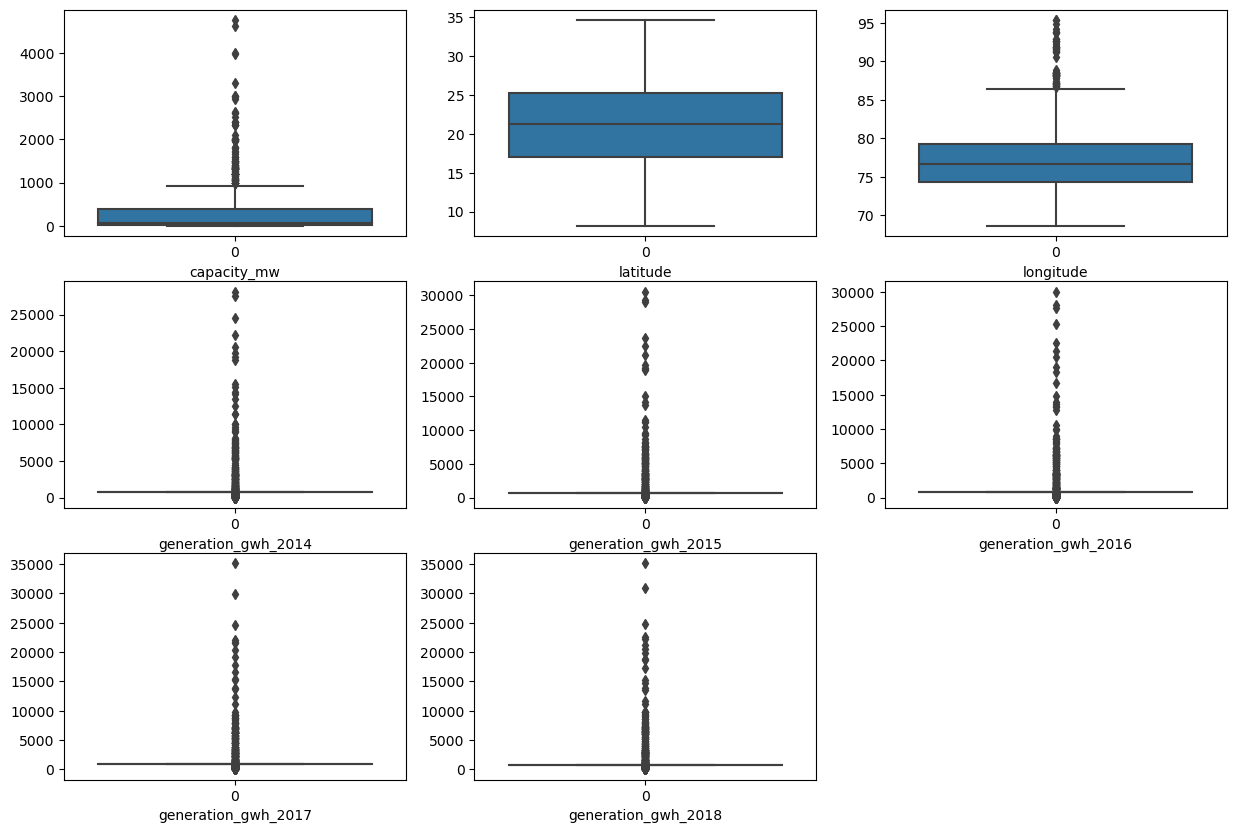

In [97]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in dff.columns :
    if plotnumber <= 9 :
        if dff[i].dtypes == 'object' :
            continue
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(dff[i])
        plt.xlabel(i , fontsize=10)
    plotnumber +=1
plt.show()    

In [98]:
outliers= dff[['capacity_mw','longitude']]
z = np.abs(zscore(outliers))

In [99]:
dff1 = df[(z<3).all(axis=1)]
dff1.shape

(867, 6)

In [100]:
print('percentage of loss is ',((dff.shape[0]-dff1.shape[0])/dff.shape[0])*100,' %')

percentage of loss is  3.7735849056603774  %


In [103]:
# use IQR method
out= dff[['capacity_mw','longitude']]
q1 = out.quantile(0)
q3 = out.quantile(0.75)
IQR = q3 - q1
dff2 = dff[~((dff <(q1 - 1.5*IQR))|(dff>(q3 + 1.5*IQR))).any(axis=1)]

In [104]:
print('percentage of loss is ',((dff.shape[0]-dff2.shape[0])/dff.shape[0])*100,' %')

percentage of loss is  12.763596004439512  %


In [105]:
# IQR is the best method

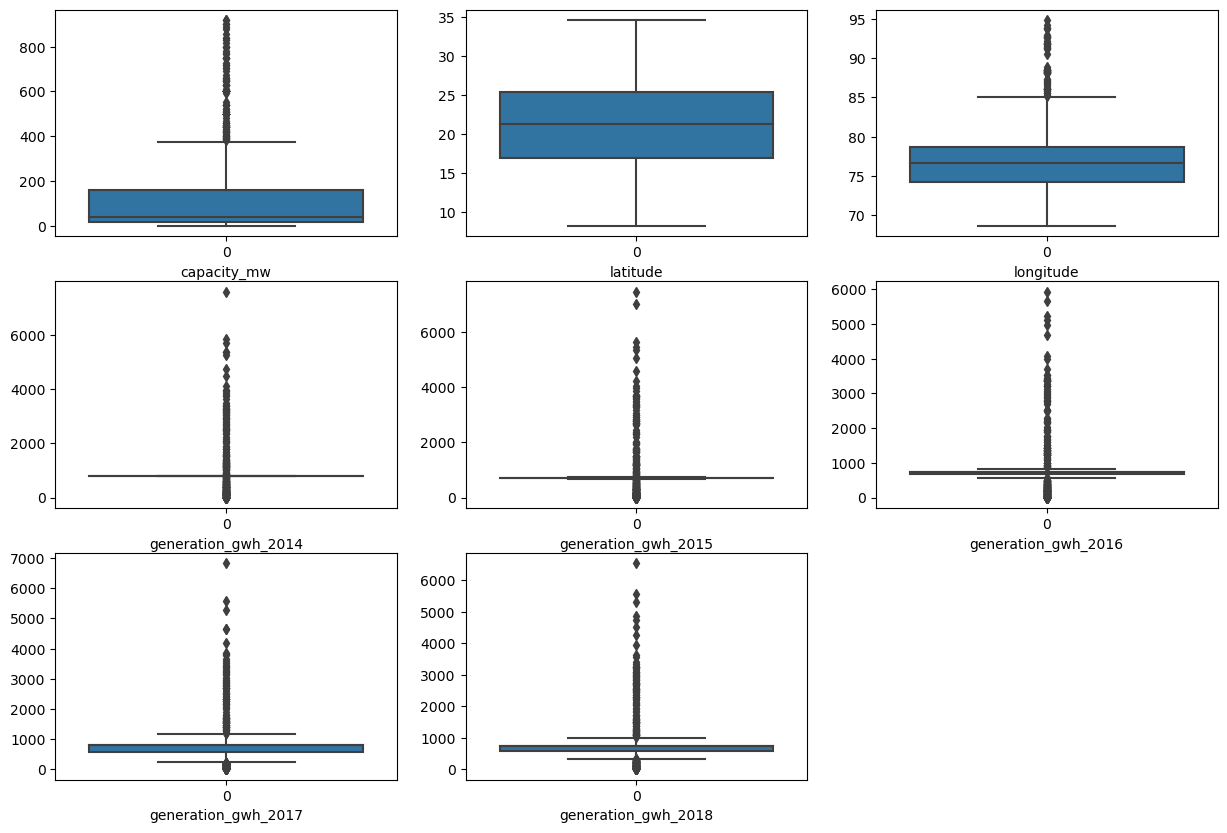

In [106]:
plt.figure(figsize=(15,10))
plotnumber = 1
for i in dff2.columns :
    if plotnumber <= 9 :
        if dff[i].dtypes == 'object' :
            continue
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(dff2[i])
        plt.xlabel(i , fontsize=10)
    plotnumber +=1
plt.show()    

we removed outliers as we could

In [107]:
#skewness
dff2.skew()

capacity_mw            1.861272
latitude              -0.104047
longitude              1.305723
generation_gwh_2014    3.508962
generation_gwh_2015    3.655207
generation_gwh_2016    3.201043
generation_gwh_2017    2.967372
generation_gwh_2018    3.019097
dtype: float64

In [110]:
power = PowerTransformer(method='yeo-johnson')
dff2[['longitude','generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']] = power.fit_transform(dff2[['longitude','generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].values)

In [111]:
dff.skew()

capacity_mw            3.112375
latitude              -0.149204
longitude              1.156818
generation_gwh_2014    5.302275
generation_gwh_2015    5.547153
generation_gwh_2016    5.263150
generation_gwh_2017    5.296213
generation_gwh_2018    5.114934
dtype: float64

In [117]:
le = LabelEncoder()
dff2['geolocation_source'] = le.fit_transform(dff2['geolocation_source'])
dff2['primary_fuel'] = le.fit_transform(dff2['primary_fuel'])
dff2['source'] = le.fit_transform(dff2['source'])

In [118]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          786 non-null    float64
 1   latitude             786 non-null    float64
 2   longitude            786 non-null    float64
 3   primary_fuel         786 non-null    int32  
 4   source               786 non-null    int32  
 5   geolocation_source   786 non-null    int32  
 6   generation_gwh_2014  786 non-null    float64
 7   generation_gwh_2015  786 non-null    float64
 8   generation_gwh_2016  786 non-null    float64
 9   generation_gwh_2017  786 non-null    float64
 10  generation_gwh_2018  786 non-null    float64
dtypes: float64(8), int32(3)
memory usage: 80.6 KB


# Building model

In [119]:
x2 = dff2.drop('capacity_mw' , axis = 1)
y2 = dff2['capacity_mw']

In [122]:
x_scaler_capacity = scaler.fit_transform(x2)
x_scaled_capacity = pd.DataFrame(x_scaler_capacity, columns = x2.columns)
x_scaled_capacity

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.141430,-0.879210,1.098341,1.312994,-0.963600,0.103169,0.118856,0.151024,0.176854,0.143902
1,0.589638,-0.455708,-1.074020,2.707693,0.428660,0.103169,0.118856,0.151024,0.176854,0.143902
2,0.127471,-2.399312,1.532813,-0.553758,0.428660,0.103169,0.118856,0.151024,0.176854,0.143902
3,0.445119,2.202165,-0.639547,-0.532301,0.428660,-0.199912,0.315806,0.372267,-0.061059,-0.056926
4,0.428602,-2.751312,-1.074020,-0.532301,0.428660,0.587844,0.775044,0.747609,0.613059,0.460513
...,...,...,...,...,...,...,...,...,...,...
781,-1.291436,0.309309,0.663869,-0.532301,0.428660,-2.664820,-2.549101,-2.460360,0.176854,-2.400932
782,-1.327344,0.437671,1.098341,0.626373,-2.355861,0.103169,0.118856,0.151024,0.176854,0.143902
783,-0.942659,-0.184041,1.532813,-0.553758,0.428660,0.103169,0.118856,0.151024,0.176854,0.143902
784,0.522424,-0.716341,-1.074020,0.261605,0.428660,0.103169,0.118856,0.151024,0.176854,0.143902


# Check variance inflation factor

In [123]:
viff = pd.DataFrame()
viff['variance inflation factor']= [variance_inflation_factor(x_scaled_capacity.values , i) for i in range(len(x_scaled_capacity.columns))]
viff['column'] = x_scaled_capacity.columns
viff

,variance inflation factor,column
0,1.092243,latitude
1,1.272914,longitude
2,1.661092,primary_fuel
3,1.551857,source
4,1.987210,geolocation_source
5,4.778717,generation_gwh_2014
6,7.818100,generation_gwh_2015
7,10.890695,generation_gwh_2016
8,8.685739,generation_gwh_2017
9,8.775964,generation_gwh_2018


There is no multi collinearity issue so we can move ahead

# Building the model

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [125]:
my_accuracy = []
my_stats = []
lrg = LinearRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled_capacity , y2 , test_size=0.25,random_state=i)
    lrg.fit(x_train,y_train)
    y_pred= lrg.predict(x_test)
    acc = r2_score(y_test , y_pred)
    my_accuracy.append(acc)
    my_stats.append(i)

In [126]:
best = pd.DataFrame()
best['accuracy'] = my_accuracy
best['no of states'] = my_stats
best[best['accuracy'] == best['accuracy'].max()]

,accuracy,no of states
659,0.580567,660


In [127]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso , Ridge
from sklearn.svm import SVR

In [128]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
et = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
las = Lasso()
ri = Ridge()
svr = SVR()
ada = AdaBoostRegressor()

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled_capacity , y2 , test_size=0.20,random_state=660)

In [130]:
models = {'LinearRegression':lrg ,'RandomForestRegressor':rfr ,'GradientBoostingRegressor':gbr ,
        'ExtraTreesRegressor':et , 'DecisionTreeRegressor':dtr ,
          'KNeighborsRegressor':knn , 'Lasso':las , 'Ridge':ri ,'SVR':svr ,'AdaBoostRegresso':ada  }

for name , m in models.items():
    m.fit(x_train , y_train)
    pred_train = m.predict(x_train)
    pred_test = m.predict(x_test)
    accuracy_test = r2_score(y_test,pred_test)
    accuracy_train = r2_score(y_train ,pred_train)
    print('model is ',name)
    print('accuracy score on test data is ','{:.2f}'.format(accuracy_test*100),' %')
    print('accuracy score on train data is ','{:.2f}'.format(accuracy_train*100),' %')
    print('mean absolute error is ',mean_absolute_error(y_test,pred_test))
    print('mean_squared_error is ',mean_squared_error(y_test,pred_test))
    print('Root mean_squared_error is ',np.sqrt(mean_squared_error(y_test,pred_test)))
    print('\n')

model is  LinearRegression
accuracy score on test data is  51.93  %
accuracy score on train data is  39.53  %
mean absolute error is  94.90829924849932
mean_squared_error is  16485.684209506242
Root mean_squared_error is  128.39658955558843


model is  RandomForestRegressor
accuracy score on test data is  73.22  %
accuracy score on train data is  96.13  %
mean absolute error is  54.1198438690283
mean_squared_error is  9183.097533818667
Root mean_squared_error is  95.82847976368333


model is  GradientBoostingRegressor
accuracy score on test data is  79.31  %
accuracy score on train data is  92.14  %
mean absolute error is  49.325374155543386
mean_squared_error is  7096.506604997344
Root mean_squared_error is  84.24076569569714


model is  ExtraTreesRegressor
accuracy score on test data is  81.96  %
accuracy score on train data is  99.94  %
mean absolute error is  42.666714831223636
mean_squared_error is  6187.848251413111
Root mean_squared_error is  78.66287721290844


model is  Decisi

ExtraTreeRegressor has the best accuracy

# Hyperparameter

In [133]:
parameters = {'max_depth':[10,20,30] ,'n_estimators' :[100,150,200]}

In [135]:
gv = GridSearchCV(ExtraTreesRegressor() , parameters)
gv.fit(x_train , y_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]})

In [136]:
gv.best_params_

{'max_depth': 10, 'n_estimators': 150}

In [139]:
new_mdel = ExtraTreesRegressor(max_depth= 10, n_estimators =150)
new_mdel.fit(x_train , y_train)
pred_train = new_mdel.predict(x_train)
pred_test = new_mdel.predict(x_test)
accuracy_test = r2_score(y_test,pred_test)
accuracy_train = r2_score(y_train ,pred_train)

print('accuracy score on test data is ','{:.2f}'.format(accuracy_test*100),' %')
print('accuracy score on train data is ','{:.2f}'.format(accuracy_train*100),' %')
print('mean absolute error is ',mean_absolute_error(y_test,pred_test))
print('mean_squared_error is ',mean_squared_error(y_test,pred_test))
print('Root mean_squared_error is ',np.sqrt(mean_squared_error(y_test,pred_test)))

accuracy score on test data is  83.12  %
accuracy score on train data is  95.06  %
mean absolute error is  45.75734180336402
mean_squared_error is  5789.3494801945835
Root mean_squared_error is  76.08777484060487


we increased accuracy from 81.96 % to 83.12 %

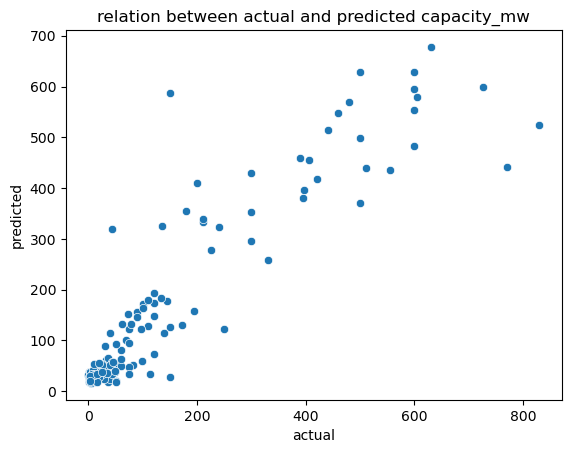

In [140]:
sns.scatterplot(x=y_test , y=pred_test)
plt.title('relation between actual and predicted capacity_mw')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

# prediction

In [143]:
predict_capacity= pd.DataFrame()
predict_capacity['actual values of capacity'] = y_test
predict_capacity['predicted values of capacity'] = pred_test
predict_capacity

,actual values of capacity,predicted values of capacity
621,4.80,32.254544
738,600.00,629.073818
673,35.10,36.712294
716,22.00,32.140113
500,14.65,36.204719
...,...,...
814,180.00,355.048099
822,300.00,353.605361
491,25.20,38.137509
838,49.60,39.370592
